Muhammad Ihsan Prawira Hutomo
2211110022

### Latihan

In [35]:
import pandas as pd

df = pd.read_csv('pantun.csv')

In [36]:
df.head()

,teks,tipe
0,Ada motor ada sepeda \n Semuanya beroda dua \n...,Pantun Adat dan Alam
1,Ada pisang ada semangka \n Jika dimakan manis ...,Pantun Adat dan Alam
2,Ada rusa ada buaya \n Sungguh hitam warna mata...,Pantun Adat dan Alam
3,Alat timbang pucuknya patah \n Beli baru henda...,Pantun Adat dan Alam
4,Anak cina makan petai \n Kakinya terikat ranta...,Pantun Adat dan Alam


In [37]:
def clear(text):
  import re
  teks_bersih = re.sub(r'\\n', '.', text)
  return teks_bersih

In [38]:
teks = df['teks'].values.tolist()

In [39]:
teks = ''.join(teks)

In [40]:
teks = clear(teks)

In [41]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

teks = sent_tokenize(teks)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
teks = teks[:10]

In [43]:
teks

['Ada motor ada sepeda .',
 'Semuanya beroda dua .',
 'Indonesia kaya budaya .',
 'Sepatutnya kita menjaganyaAda pisang ada semangka .',
 'Jika dimakan manis rasanya .',
 'Indonesia ragam budaya .',
 'Tugas kita tuk menjaganyaAda rusa ada buaya .',
 'Sungguh hitam warna matanya .',
 'Ada adat seribu bahasa .',
 'Kita wajib menghormatinyaAlat timbang pucuknya patah .']

In [44]:
import string
from nltk.tokenize import word_tokenize

# Function to remove punctuation from a given sentence
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans("", "", string.punctuation))

# Tokenize and remove punctuation for each sentence
tokenized_text = [word_tokenize(remove_punctuation(sentence)) for sentence in teks]

# Print the tokenized sentences without punctuation
for tokens in tokenized_sentences:
    print(tokens)


['Ada', 'motor', 'ada', 'sepeda']
['Semuanya', 'beroda', 'dua']
['Indonesia', 'kaya', 'budaya']
['Sepatutnya', 'kita', 'menjaganyaAda', 'pisang', 'ada', 'semangka']
['Jika', 'dimakan', 'manis', 'rasanya']
['Indonesia', 'ragam', 'budaya']
['Tugas', 'kita', 'tuk', 'menjaganyaAda', 'rusa', 'ada', 'buaya']
['Sungguh', 'hitam', 'warna', 'matanya']
['Ada', 'adat', 'seribu', 'bahasa']
['Kita', 'wajib', 'menghormatinyaAlat', 'timbang', 'pucuknya', 'patah']


### Ubah variabel teks(diatas), menjadi vektor word2vec dan fastext, serta tampilkan 4 kata yang similar

In [45]:
tokenized_text

[['Ada', 'motor', 'ada', 'sepeda'],
 ['Semuanya', 'beroda', 'dua'],
 ['Indonesia', 'kaya', 'budaya'],
 ['Sepatutnya', 'kita', 'menjaganyaAda', 'pisang', 'ada', 'semangka'],
 ['Jika', 'dimakan', 'manis', 'rasanya'],
 ['Indonesia', 'ragam', 'budaya'],
 ['Tugas', 'kita', 'tuk', 'menjaganyaAda', 'rusa', 'ada', 'buaya'],
 ['Sungguh', 'hitam', 'warna', 'matanya'],
 ['Ada', 'adat', 'seribu', 'bahasa'],
 ['Kita', 'wajib', 'menghormatinyaAlat', 'timbang', 'pucuknya', 'patah']]

In [23]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [81]:
model_w2v = Word2Vec(sentences=tokenized_text, vector_size=10, window=5, min_count=1, workers=4)

Vector Size = 10, yang berarti jumlah dimensi vektor yang tercipta adalah 10,
window = 5 berarti kata yang sebelum dan sesudah kata target dipilih adalah 5 kata,
min_count = 1 berarti menghitung kemunculan angka jika pernah dalam 1 window yang sama




In [82]:
model_w2v

In [83]:
words = list(model_w2v.wv.index_to_key)
vector_W2V = [model_w2v.wv[word] for word in words]
vector_W2V = np.array(vector_W2V)


'\nindex_to_key buat menampilkan daftar kata yang ada pada sebuah model\nlakukan komperhensi untuk mengubah kata menjadi vektor dengan model_W2V\nubah menjadi numpy array\n'

In [84]:
tsne = TSNE(n_components=2, perplexity=min(5, len(vector_W2V)-1), random_state=42)
vectors_tsne = tsne.fit_transform(vector_W2V)

In [85]:
words

['ada',
 'Ada',
 'budaya',
 'menjaganyaAda',
 'kita',
 'Indonesia',
 'Jika',
 'semangka',
 'pisang',
 'Sepatutnya',
 'kaya',
 'manis',
 'dua',
 'beroda',
 'Semuanya',
 'sepeda',
 'motor',
 'dimakan',
 'patah',
 'pucuknya',
 'ragam',
 'timbang',
 'menghormatinyaAlat',
 'wajib',
 'Kita',
 'bahasa',
 'seribu',
 'adat',
 'matanya',
 'warna',
 'hitam',
 'Sungguh',
 'buaya',
 'rusa',
 'tuk',
 'Tugas',
 'rasanya']

In [86]:
tsne = TSNE(n_components=2, perplexity=min(5, len(vector_W2V)-1), random_state=42)
vectors_tsne = tsne.fit_transform(vector_W2V)

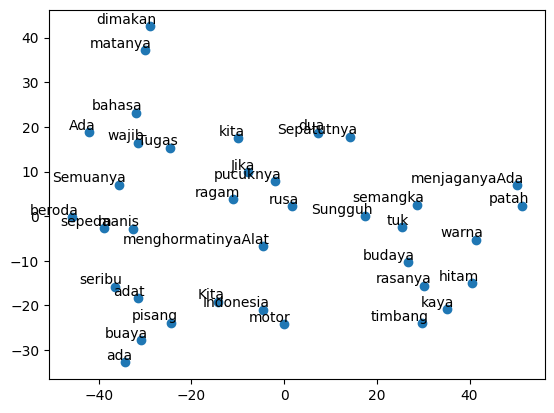

In [87]:
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right')

plt.show()

### Gensim Fasttext

In [88]:
from gensim.models import FastText

model_fasttext = FastText(sentences=tokenized_text, vector_size=10, window=5, min_count=1, workers=4)

Vector Size = 10, yang berarti jumlah dimensi vektor yang tercipta adalah 10,
window = 5 berarti kata yang sebelum dan sesudah kata target dipilih adalah 5 kata,
min_count = 1 berarti menghitung kemunculan angka jika pernah dalam 1 window yang sama




In [89]:
words = list(model_fasttext.wv.index_to_key)
vector_fasttext = [model_fasttext.wv[word] for word in words]
vector_fasttext = np.array(vector_fasttext)

In [90]:
words

['ada',
 'Ada',
 'budaya',
 'menjaganyaAda',
 'kita',
 'Indonesia',
 'Jika',
 'semangka',
 'pisang',
 'Sepatutnya',
 'kaya',
 'manis',
 'dua',
 'beroda',
 'Semuanya',
 'sepeda',
 'motor',
 'dimakan',
 'patah',
 'pucuknya',
 'ragam',
 'timbang',
 'menghormatinyaAlat',
 'wajib',
 'Kita',
 'bahasa',
 'seribu',
 'adat',
 'matanya',
 'warna',
 'hitam',
 'Sungguh',
 'buaya',
 'rusa',
 'tuk',
 'Tugas',
 'rasanya']

In [91]:
vector_fasttext

array([[-1.25113665e-03, -8.09163903e-04,  1.75516326e-02,
         1.31290602e-02,  3.47573683e-03, -1.26387766e-02,
         2.04694271e-02,  1.21637539e-03, -3.49255987e-02,
         2.57294290e-02],
       [ 1.48618435e-02, -2.40702927e-03,  7.52956094e-03,
         2.57575810e-02,  2.39870325e-03,  1.72808636e-02,
         1.98359992e-02,  8.95017851e-03, -1.20136049e-02,
        -7.72224413e-03],
       [-8.22256377e-04,  9.93958022e-03,  2.63124947e-02,
        -1.07634102e-03, -5.74612571e-03, -9.14274075e-04,
         2.10393090e-02,  1.52405407e-02, -2.65046395e-02,
        -4.04378865e-03],
       [-1.09174950e-02,  7.69271096e-03,  2.97038537e-03,
         1.52244112e-02,  9.40200221e-03, -4.22893651e-03,
        -3.27407615e-03, -3.81246064e-04, -3.15309200e-03,
         8.83153267e-03],
       [ 9.56547819e-03,  1.06474468e-02, -1.64442509e-02,
        -2.14710776e-02, -1.31667107e-02,  2.18622130e-03,
         8.05088901e-04,  3.26556936e-02,  8.56247637e-03,
         2.

In [92]:
tsne = TSNE(n_components=2, perplexity=min(5, len(vector_fasttext)-1), random_state=42)
vectors_tsne = tsne.fit_transform(vector_fasttext)

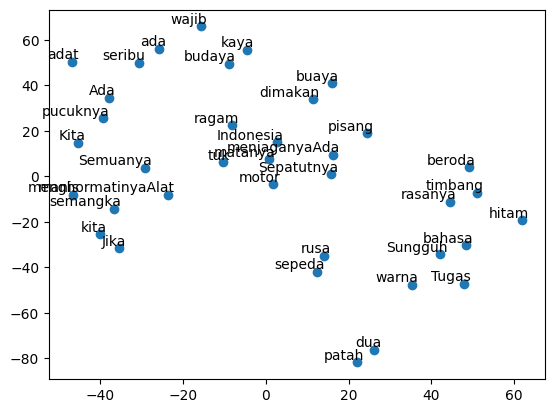

In [93]:
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right')

plt.show()

### Perbandingan hasil Word2Vec dan Fasttext

In [94]:
# representasi kata makan
word_w2v = model_w2v.wv['Indonesia']
word_fasttext = model_fasttext.wv['Indonesia']

print("Word2Vec:", word_w2v)
print("FastText:", word_fasttext)

Word2Vec: [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
FastText: [ 0.00349326  0.01232869 -0.00438162  0.00658719 -0.00472532  0.01616161
 -0.00179559  0.01636026 -0.00118681  0.00995372]


### Mencari kata yang similar

In [95]:
# Gunakan model Word2Vec atau FastText yang telah dilatih
similar_words_w2v = model_w2v.wv.most_similar('Indonesia', topn=4)
similar_words_fasttext = model_fasttext.wv.most_similar('Indonesia', topn=4)

print(f"Word2Vec - Kata serupa dengan 'Indonesia':{similar_words_w2v}")
print(f"FastText - Kata serupa dengan 'Indonesia':{similar_words_fasttext}")

Word2Vec - Kata serupa dengan 'Indonesia':[('motor', 0.5916882157325745), ('menghormatinyaAlat', 0.5115841627120972), ('rusa', 0.5002487897872925), ('Kita', 0.46192681789398193)]
FastText - Kata serupa dengan 'Indonesia':[('adat', 0.5899585485458374), ('tuk', 0.5600650906562805), ('kita', 0.5257759690284729), ('ragam', 0.4961792230606079)]


Interpretasi
Dari 2 model tersebut, pencarian 4 kata terbaik relatif jatuh kepada FastText.
Dari kata 'Indonesia yang diuji kata nya cukup mirip dan dekat dengan 'adat', 'ragam' yang cocok dengan konteks 'Indonesia'.